# make movie of an experimental campaign

In [1]:
import os

import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt

import pynsitu as pin
crs = pin.maps.crs
import pynsitu.movies as movies

In [2]:
## taos
root_dir = "/Users/aponte/Current_Projects/taos/campagnes"

# load all
#cp = pin.Campaign(os.path.join(root_dir,f"taos0/drifters0/taos0_drifters0.yaml"))
#cp = pin.Campaign(os.path.join(root_dir,f"taos0/drifters1/taos0_drifters1.yaml"))
#
#cp = pin.Campaign(os.path.join(root_dir,f"taos1/drifters0/taos1_drifters0.yaml"))
#cp = pin.Campaign(os.path.join(root_dir,f"taos1/drifters1/taos1_drifters1.yaml"))
#
cp = pin.Campaign(os.path.join(root_dir,f"taos2/drifters0/taos2_drifters0.yaml"))
#cp = pin.Campaign(os.path.join(root_dir,f"taos2/drifters1/taos2_drifters1.yaml"))

# plot all deployments
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    print(platform, sensor, deployment)
    
# for plotting purposes
bounds = cp["bounds"]
if cp["name"]=="taos0_drifters0":
    bounds=[-.4, .0, 49.25, 49.4]
elif cp["name"]=="taos0_drifters1":
    bounds=[-.45, -.15, 49.25, 49.45]

map_tile_kwargs = dict(
    extent=bounds, rivers=False, tile=("toner-lite", 12), land=False, bathy=False, coastline=False, gridlines=False
)

None None day0 / start 2023-05-05 07:00:00 / end 2023-05-05 20:00:00
hydrophone None d0 / start 2023-05-05 07:55:00 / end 2023-05-05 11:23:00
hydrophone None d1 / start 2023-05-09 09:16:00 / end 2023-05-09 13:31:00
hydrophone None d2 / start 2023-05-11 10:32:00 / end 2023-05-11 13:35:00
hydrophone ctd s0 / start 2023-05-05 08:17:40 / end 2023-05-05 08:21:40
hydrophone ctd s1 / start 2023-05-05 08:25:10 / end 2023-05-05 08:27:00
hydrophone ctd s2 / start 2023-05-05 08:30:50 / end 2023-05-05 08:32:50
hydrophone ctd s3 / start 2023-05-05 08:37:00 / end 2023-05-05 08:40:40
hydrophone ctd s4 / start 2023-05-05 08:45:10 / end 2023-05-05 08:47:50
hydrophone ctd s5 / start 2023-05-05 08:53:00 / end 2023-05-05 08:54:00
hydrophone ctd s6 / start 2023-05-05 08:59:00 / end 2023-05-05 09:02:00
hydrophone ctd s7 / start 2023-05-05 09:06:00 / end 2023-05-05 09:09:00
hydrophone ctd s8 / start 2023-05-05 09:17:10 / end 2023-05-05 09:18:40
hydrophone ctd c0 / start 2023-05-05 09:22:19 / end 2023-05-05 0

In [3]:
# drifters
dr = cp.load('drifters.nc', toframe=True)
dr = (dr
      .reset_index()
      .drop(columns="id")
      .rename(columns=dict(platform="id"))
)
#dr_keys = list(dr["platform"].unique())
dr_keys = list(dr["id"].unique())
colors = pin.get_cmap_colors(len(dr_keys))
colorsd = {d: c for d, c in zip(dr_keys, colors)}

if cp["name"]=="taos2_drifters1":
    odo = cp.load("odo_drifter", toframe=True)
    yuco = cp.load("yuco", toframe=True)

# ships
ship = dict()
for s in ["hydrophone", "parceque", "delphy"]:
    if s in cp:
        ship[s] = cp.load(s, toframe=True, ignore=True)
        
wind = cp.load("arome.nc")
slvl = cp.load('tide_gauge_ouistreham.nc')

dr.head()

,time,DataId,CommId,GpsQuality,latitude,longitude,BatteryStatus,GPS Confidence,GPS Fail Counter,deployment,id,x,y,velocity_east,velocity_north,velocity,acceleration_east,acceleration_north,acceleration
0,2023-05-05 08:17:00,46036157.0,0-4351904,3.0,49.340140,-0.246866,GOOD,0.0,0.0,d0,drifter0,-3.986140e+06,6.064969e+06,0.296244,-0.077311,0.306166,-0.000038,0.000021,0.000043
1,2023-05-05 08:18:00,46036157.0,0-4351904,3.0,49.340099,-0.246623,GOOD,0.0,0.0,d0,drifter0,-3.986125e+06,6.064959e+06,0.293498,-0.075835,0.303137,-0.000038,0.000021,0.000043
2,2023-05-05 08:19:00,46036157.0,0-4351904,3.0,49.340058,-0.246381,GOOD,0.0,0.0,d0,drifter0,-3.986109e+06,6.064948e+06,0.291661,-0.074848,0.301112,-0.000031,0.000016,0.000035
3,2023-05-05 08:20:00,46036157.0,0-4351904,3.0,49.340018,-0.246141,GOOD,0.0,0.0,d0,drifter0,-3.986094e+06,6.064938e+06,0.289815,-0.073856,0.299077,-0.000031,0.000017,0.000035
4,2023-05-05 08:21:00,46036338.0,0-4351904,3.0,49.339978,-0.245903,GOOD,0.0,0.0,d0,drifter0,-3.986078e+06,6.064928e+06,0.287958,-0.072859,0.297032,-0.000031,0.000017,0.000035


---
### time line

<Axes: title={'center': 'taos2_drifters0'}>

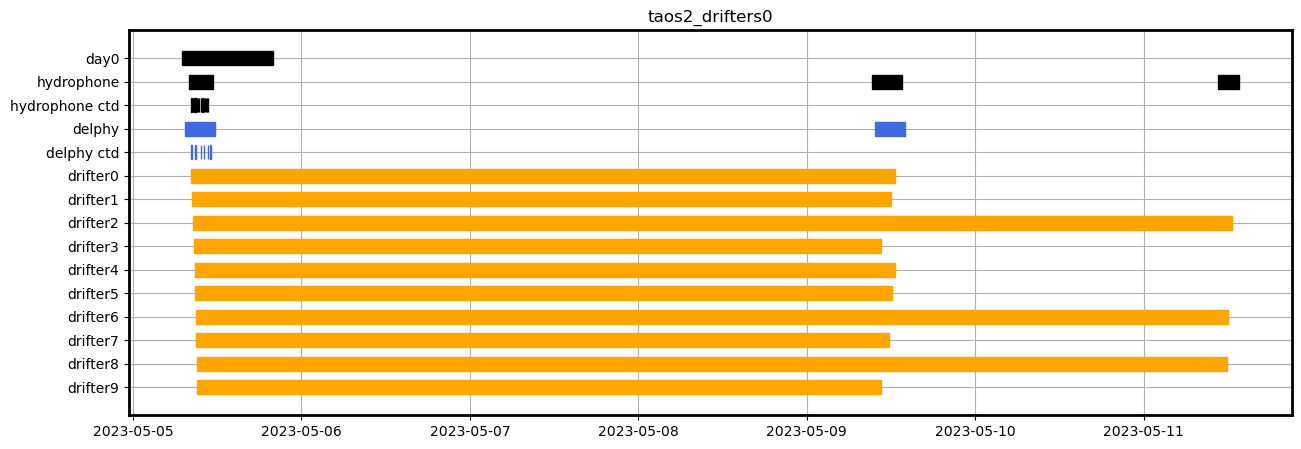

In [4]:
cp.timeline()

---

## movie


In [5]:
#map_gen = lambda : cp.map(extent=bounds, rivers=False, tile=("toner-lite", 12), land=False, bathy=False, coastline=False)
extent = None
figsize = (8,8)
#figsize = (10,5)
#if cp["name"]=="taos2_drifters0":   
# or dynamic adjustment of extent
map_gen = lambda extent: cp.map(extent=extent, rivers=False, tile=("toner-lite", 12), 
                                land=False, bathy=False, coastline=False,
                                figsize=figsize,
                               )

kwargs = dict()
exclude = []

kwargs["drifters"] = dict(dtype="drifter", data=dr, colors=colorsd, dt_trail="1H", head_style=dict(alpha=0.5))

if cp["name"]=="taos2_drifters1":
    kwargs["odo"] = dict(dtype="moving", data=odo, color=cp["odo_drifter"]["color"], dt_trail="1H", head_style=dict(alpha=0.5, marker="*"))
    kwargs["yuco"] = dict(dtype="moving", data=yuco, color=cp["yuco"]["color"], dt_trail="1H", head_style=dict(alpha=0.5, marker="o"))
    exclude.append("yuco")

ship_trail = "1H"
if "hydrophone" in ship:
    kwargs["hydrophone"] = dict(dtype="moving", data=ship["hydrophone"], color=cp["hydrophone"]["color"], dt_trail=ship_trail)
    exclude.append("hydrophone")
if "parceque" in ship:
    kwargs["parceque"] = dict(dtype="moving", data=ship["parceque"], color=cp["parceque"]["color"], dt_trail=ship_trail)
    exclude.append("parceque")
if "delphy" in ship:
    kwargs["delphy"] = dict(dtype="moving", data=ship["delphy"], color=cp["delphy"]["color"], dt_trail=ship_trail)
    exclude.append("delphy")

kwargs["wind"] = dict(dtype="vector_field", data=wind, u="u10m", v="v10m", uref=10, di=3, scale=1e2, color="0.7")
exclude.append("wind")

if extent is None:
    extent = dict(
        buffer=.1, # aspect_ratio should match figsize
        aspect_ratio=figsize,  
        exclude=exclude,
    )

start = cp["start"] # +pd.Timedelta("3H")
end = cp["end"] #+pd.Timedelta("1D")

# add vignete with tide
def extra(t, data, fig, ax):
    ax = fig.add_axes([.15, .2, .2, .2]) # (left, bottom, width, height)
    ax.plot(slvl["time"], slvl["sea_level"], color="k")
    s = slvl.sea_level.interp(time=t)
    ax.scatter(t, s, marker="o", color="r", s=10, zorder=10)
    ax.axhline(s, color="r")
    ax.set_xticklabels("")
    ax.set_ylim(0,8)
    dt = pd.Timedelta("8D")
    ax.set_xlim(t-dt, t+dt)
    ax.yaxis.tick_right()

mv = movies.movie(
    start, end, "10T",
    map_gen,
    os.path.join(cp["path_processed"], 'figs/'),
    extent=extent,
    **kwargs,
    #legend=True,
    extra=extra,
    legend="upper right",
)

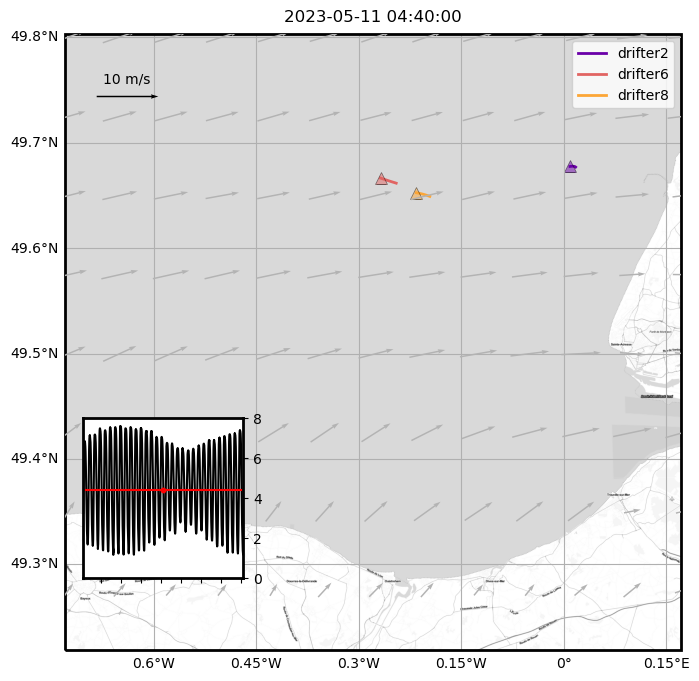

In [7]:
#mv.plot_snapshot(25);
mv.plot_snapshot(850);

In [8]:
# collect extents
extents = mv.dry_run()

# padd and smooth extents
new_extents = movies.pad_smooth_extents(extents, 10)

# dev
#e = pd.DataFrame(padded_extents)
#ne = pd.DataFrame(new_extents)
#e[1].hvplot() * ne[1].hvplot()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 907/907 [00:45<00:00, 19.86it/s]


In [9]:
mv.make_figures(extents=new_extents)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 907/907 [22:57<00:00,  1.52s/it]


In [10]:
movies.generate_mpg(mv.fig_dir, cp["name"])

movies should be ready at: /Users/aponte/Code/taos/insitu/taos2/taos2_drifters0.mp4
